# Binary classification for skirts
* Classify whether an image is a skirt or not
* Dataset: fashion_mnist (https://github.com/zalandoresearch/fashion-mnist)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.options.display.max_columns = None

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

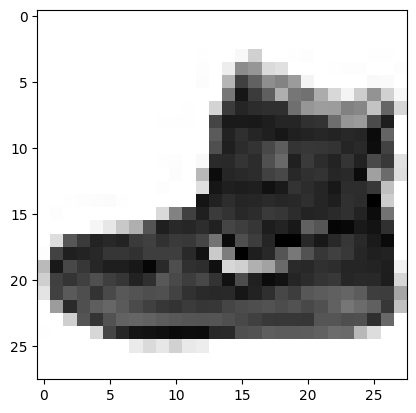

In [3]:
plt.imshow(train_images[0], cmap='Greys', vmin=0, vmax=255)

In [4]:
# Original Label
# 6 = skirt
print(train_labels[:20])
print(test_labels[:20])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [5]:
# # Binary classification labels
# # 0 = not a skirt
# # 1 = a skirt
train_labels = (train_labels == 6).astype(np.int8)
test_labels = (test_labels == 6).astype(np.int8)

In [6]:
print(train_labels[:20])
print(test_labels[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.3, random_state=0)

In [8]:
print("train_images=", train_images.shape)
print("train_labels=", train_labels.shape)
print("valid_images=", valid_images.shape)
print("valid_labels=", valid_labels.shape)
print("test_images=", test_images.shape)
print("test_labels=", test_labels.shape)

train_images= (42000, 28, 28)
train_labels= (42000,)
valid_images= (18000, 28, 28)
valid_labels= (18000,)
test_images= (10000, 28, 28)
test_labels= (10000,)


In [9]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,033 (1.82 MB)

 Trainable params: 476,033 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
%%time
log = model.fit(train_images, train_labels, epochs=200, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(valid_images, valid_labels))

Epoch 1/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9035 - loss: 0.3514 - val_accuracy: 0.9190 - val_loss: 0.2069
Epoch 2/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9175 - loss: 0.2186 - val_accuracy: 0.9251 - val_loss: 0.2094
Epoch 3/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9223 - loss: 0.2092 - val_accuracy: 0.9289 - val_loss: 0.1855
Epoch 4/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.9273 - loss: 0.2009 - val_accuracy: 0.9301 - val_loss: 0.1836
Epoch 5/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9279 - loss: 0.1988 - val_accuracy: 0.9346 - val_loss: 0.1961
Epoch 6/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9284 - loss: 0.1940 - val_accuracy: 0.9337 - val_loss: 0.2142
Epoch 7/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.9295 - loss: 0.1931 - val_accuracy: 0.9340 - val_loss: 0.1793
Epoch 8/200
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 

Text(0, 0.5, 'crossentropy')

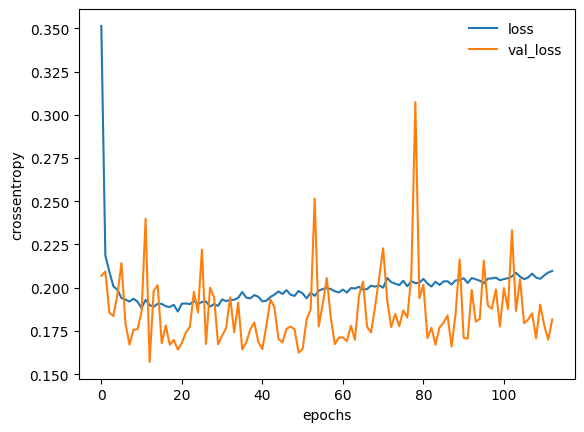

In [12]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [15]:
predict_labels = model.predict(test_images)
predict_labels = (predict_labels > 0.5).astype("int8").reshape(-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [16]:
print(classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9000
           1       0.61      0.66      0.63      1000

    accuracy                           0.92     10000
   macro avg       0.79      0.80      0.80     10000
weighted avg       0.93      0.92      0.93     10000

